# POS Chunking
**1. Create a chunker that detects noun-phrases (NPs) and lists the NPs in the text below.**

- Both [NLTK](https://www.nltk.org/book/ch07.html) and [spaCy](https://spacy.io/api/matcher) supports chunking
- Look up RegEx parsing for NLTK and the document object for spaCy.
- Make use of what you've learned about tokenization.

In [4]:
import nltk
import spacy

text = "The language model predicted the next word. It was a very nice word!"
# TODO: set up a pos tagger and a chunker.

# set up a pos tagger
nlp = spacy.load("en_core_web_sm")

def getListOfNPs(text, nlp):
    doc = nlp(text)
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]
    return noun_phrases
    
print(getListOfNPs(text, nlp))
# Output: a list of all tokens, grouped as noun-phrases where applicable

['The language model', 'the next word', 'It', 'a very nice word']


**2. Modify the chunker to handle verb-phases (VPs) as well.**
- This can be done by using a RegEx parser in NLTK or using a spaCy Matcher.

In [ ]:
# TODO: set up grammars to chunk VPs

grammar = """
    VP: {MYGRAMMAR}
"""

**3. Verb-phrases (VPs) can be defined by many different grammatical rules. Give four examples.**
- Hint: Context-Free Grammars, chapter 8 in NLTK.

Simple verb phrase, example: "runs"

Verb with direct object (transitive verb), example: "eats an apple"


Verb with indirect and direct object, example: "gave her a gift"

Verb with adverbial modifiers, example: "runs quickly"

**4. After these applications, do you find chunking to be beneficial in the context of language modeling and next-word prediction? Why or why not?**

It may enhance language modeling and next-word prediction by giving it more structural and semantic context

___

# Dependency Parsing

**1. Use spaCy to inspect/visualise the dependency tree of the text provided below.**
- Optional addition: visualize the dependencies as a graph using `networkx`

The det model NOUN []
language compound model NOUN []
model nsubj predicted VERB [The, language]
predicted ROOT predicted VERB [model, word]
the det word NOUN []
next amod word NOUN []
word dobj predicted VERB [the, next]


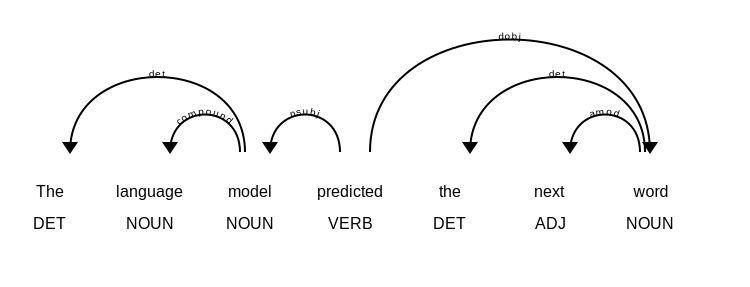

In [7]:
from spacy import displacy
from IPython.display import SVG, display

text = "The language model predicted the next word"
# TODO: use spacy and displacy to visualize the dependency tree
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

# Visualize the dependency tree
displacy_image = displacy.render(doc, style="dep", jupyter=False, options={'distance': 100})
display(SVG(displacy_image))

**2. What is the root of the sentence? Attempt to spot it yourself, but the answer should be done by code**

In [8]:
# TODO: implement a function to find the root of the document
# Return both the word and its POS tag

def getSentenceRoot(text, nlp):
    doc = nlp(text)
    for token in doc:
        if token.dep_ == "ROOT":
            return token.text, token.pos_

print(getSentenceRoot(text, nlp))

('predicted', 'VERB')


**3. Find the subject and object of a sentence. Print the results for the sentence above.**

In [11]:
# TODO: implement a function to find the subjects + objects in the document

def getSubjectsAndObjects(text, nlp):
    doc = nlp(text)
    subjects = [(token.text, token.pos_) for token in doc if "subj" in token.dep_]
    objects = [(token.text, token.pos_) for token in doc if "obj" in token.dep_]
    return subjects, objects

print(getSubjectsAndObjects(text, nlp))

([('model', 'NOUN')], [('word', 'NOUN')])


**4. How would you use the relationships extracted from dependency parsing in language modeling contexts?**

I would try to use it to find the meaning of words that can be both noun ar verb for example. Also I would use to to help a system determine if there are typing errors in a text by adressing if the grammatical structure makes sense, possible exchanging words with a mask such that the full sentence is coherrent.

# Wordnet

**1. Use Wordnet (from NLTK) and create a function to get all synonyms of a word of your choice. Try with "language"**

In [24]:
from nltk.corpus import wordnet as wn
# nltk.download('wordnet')
# TODO: find synonyms

def getListOfSynonyms(word):
    synonyms = wn.synsets(word)
    return [synonym.lemmas()[0].name() for synonym in synonyms]

getListOfSynonyms = getListOfSynonyms("language")
for synonym in getListOfSynonyms:
    print(synonym)

language
speech
lyric
linguistic_process
language
terminology


**2. From the same word you chose, extract an additional 4 or more features from wordnet (such as hyponyms). Describe each category briefly.**

In [33]:
"""
Antonyms:
Words that have the opposite meaning of the chosen word.
Hyponyms:
More specific terms that fall under the category of the chosen word.
Hypernyms:
Broader terms that encompass the chosen word within a larger category.
Meronyms:
Words that represent parts of or pieces of the chosen word.
"""

# TODO: expand the function to find more features!

def getListOfWordFeatures(word):
    synsets  = wn.synsets(word)
    antonyms = []
    hyponyms = []
    hypernyms = []
    meronyms = []
    for synset in synsets:
        antonyms.extend([antonym.lemmas()[0].name() for antonym in synset.lemmas()[0].antonyms()])
        hyponyms.extend([hyponym.lemmas()[0].name() for hyponym in synset.hyponyms()])
        hypernyms.extend([hypernym.lemmas()[0].name() for hypernym in synset.hypernyms()])
        meronyms.extend([meronym.lemmas()[0].name() for meronym in synset.part_meronyms()])
    return {
        "antonyms": antonyms,
        "hyponyms": hyponyms,
        "hypernyms": hypernyms,
        "meronyms": meronyms
    }

word_features = getListOfWordFeatures("language")
for feature, values in word_features.items():
    print(feature, values)

antonyms []
hyponyms ['artificial_language', 'barrage', 'dead_language', 'indigenous_language', 'lingua_franca', 'metalanguage', 'native_language', 'natural_language', 'object_language', 'sign_language', 'slanguage', 'source_language', 'string_of_words', 'superstrate', 'usage', 'words', 'conversation', 'dictation', 'discussion', 'idiolect', 'monologue', 'non-standard_speech', 'pronunciation', 'saying', 'soliloquy', 'spell', 'words', 'love_lyric', 'reading', 'markup_language', 'toponymy']
hypernyms ['communication', 'auditory_communication', 'text', 'higher_cognitive_process', 'faculty', 'word']
meronyms ['lexis', 'vocabulary']


___

# Machine Learning Exercise - A sentiment classifier
- A rule-based approach with SentiWordNet + A machine learning classifier

**1. There are several steps required to build a classifier or any sort of machine learning application for textual data. For data including (INPUT_TEXT, LABEL), list the typical pipeline for classification.**

A typical pipeline for classifying textual data involves first preprocessing the text. Like tokenization, normalization, and removing stopwords
Then feature extraction such as TF-IDF or word embeddings to convert text into a machine learning friendly format.
Then the processed data is fed into a classification model that is trained on the input features to predict the labels.

**2. Before developing a classifier, having a baseline is very useful. Build a baseline model for sentiment classification using SentiWordNet.**
- How you decide to aggregate sentiment is up to you. Explain your approach.
- It should report the accuracy of the classifier.

In [40]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
import math
# nltk.download('sentiwordnet')

# TODO: implement a function to get the sentiment of a text
# Must use the sentiwordnet lexicon

# I've used the sentiwordnet to get the sentiment of
# each token in the text, and then I've summed them up.
# The result is then passed through a sigmoid function
# to get a value between 0 and 1, which is then returned.

def getSentiment(text, nlp):
    doc = nlp(text)
    total_sentiment = 0
    for token in doc:
        synsets = wn.synsets(token.text)
        if synsets:
            synset = synsets[0]
            sentiment = swn.senti_synset(synset.name())
            total_sentiment += sentiment.pos_score() - sentiment.neg_score()
    sigmoidValue = 1 / (1 + math.exp(-total_sentiment))
    return sigmoidValue

def getAccuracy(y_true, y_pred):
    return sum([1 for true, pred in zip(y_true, y_pred) if true == pred]) / len(y_true)

# Evaluate it on the following sentences:
sents = [
    "I liked it! Did you?",
    "It's not bad but... Nevermind, it is.",
    "It's awful",
    "I don't care if you loved it - it was terrible!",
    "I don't care if you hated it, I think it was awesome"
]
# 0: negative, 1: positive
y_true = [1, 0, 0, 0, 1]

preds = []

for sent, true in zip(sents, y_true):
    print(getSentiment(sent, nlp), true)
    preds.append(round(getSentiment(sent, nlp), 0))

print(f"Accuracy: {getAccuracy(y_true, preds)}")

0.5312093733737563 1
0.20181322226037884 0
0.29421497216298875 0
0.46879062662624377 0
0.5 1
Accuracy: 0.8


## The SST-2 binary sentiment dataset

**3. Split the training set into a training and test set. Choose a split size, and justify your choice.**

In [49]:
from datasets import load_dataset
dataset = load_dataset("sst2")

train_df = dataset["train"].to_pandas().drop(columns=["idx"])
train_df = train_df.sample(10000)  # a tiny subset
print(train_df.label.value_counts())
train_df.head()

label
1    5535
0    4465
Name: count, dtype: int64


,sentence,label
11724,this listless feature,0
59435,close to real life,1
66633,a lovely trifle,1
58626,"not the great american comedy , but if you lik...",1
47410,"a very funny , heartwarming film",1


In [56]:
# TODO: split the data

# I think 15% testing data is a good amount

def splitData(df, train_size=0.85):
    train_xy = df.sample(frac=train_size)
    test_xy = df.drop(train_xy.index)
    return train_xy, test_xy

df = train_df.copy()
df.reset_index(drop=True, inplace=True)


train_xy, test_xy = splitData(df, 0.85)

print(f"Training data points: {train_df.shape}")
print(f"Training data points: {train_xy.shape}")
print(f"Testing data points: {test_xy.shape}")

print(test_xy.head())

Training data points: (10000, 2)
Training data points: (8500, 2)
Testing data points: (1500, 2)
                                             sentence  label
0                              this listless feature       0
25                            gorgeous color palette       1
29  in a summer of clones , harvard man is somethi...      1
33                            sour , bloody and mean       0
39                                 own meager weight       0


**4. Evaluate your baseline model on the test set.**

- Additionally: compare it against a random baseline. That is, a random guess for each example

In [61]:
# TODO: evaluate on test set + random guess
# Report results in terms of accuracy

preds = []
printCount = 10

for index, row in test_xy.iterrows():
    if printCount > 0:
        print(row['sentence'], row['label'])
        print(getSentiment(row['sentence'], nlp), row['label'])
        printCount -= 1
    preds.append(round(getSentiment(row['sentence'], nlp), 0))

print(f"Accuracy: {getAccuracy(y_true, preds)}")

this listless feature  0
0.5621765008857981 0
gorgeous color palette  1
0.679178699175393 1
in a summer of clones , harvard man is something rare and riveting : a wild ride that relies on more than special effects .  1
0.6224593312018546 1
sour , bloody and mean  0
0.5 0
own meager weight  0
0.34864513533394575 0
by someone who obviously knows nothing about crime  0
0.7549149868676283 0
gimmicks  0
0.3775406687981454 0
is n't that much different from many a hollywood romance  0
0.7310585786300049 0
a markedly inactive film , city is conversational bordering on confessional .  0
0.40733340004593027 0
one fantastic visual trope  1
0.5926665999540697 1
Accuracy: 0.4


**5. Did you beat random guess?**

If not, can you think of any reasons why?

It might be vecause many sentences hasn't got much sentiment to them but they still have a score of 0 or 1. For example: "this listless feature" sentiment: 0

## Classification with Naive Bayes and TF-IDF
This is the final task of the lab. You will use high-level libraries to implement a TF-IDF vectorizer and train your data using a Naive Bayes classifier

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# TODO: use scikit-learn to...
# - normalize
# - vectorize/extract features
# - train a classifier
# - evaluate the classifier using `classification_report` and `accuracy`
# 
# expect an accuracy of > 0.8


vectorizer = TfidfVectorizer()
normalizer = Normalizer()
classifier = MultinomialNB()

pipeline = make_pipeline(vectorizer, normalizer, classifier)
pipeline.fit(train_xy['sentence'], train_xy['label'])
preds = pipeline.predict(test_xy['sentence'])

print(classification_report(test_xy['label'], preds))
print(f"Accuracy: {getAccuracy(test_xy['label'], preds)}")

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       664
           1       0.82      0.90      0.86       836

    accuracy                           0.83      1500
   macro avg       0.84      0.82      0.83      1500
weighted avg       0.83      0.83      0.83      1500

Accuracy: 0.8313333333333334


## Optional task: using a pre-trained transformer model
If you wish to push the accuracy as far as you can, take a look at BERT-based or other pre-trained language models. As a starting point, take a look at a model already fine-tuned on the SST-2 dataset: [DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english)

**Advanced:**

Going beyond this, you could look into the addition of a *classification head* on top of the pooling layer of a BERT-based model. This is a common approach to fine-tuning these models on classification or regression problems.